# **Introduction**



In this project, the objective is to develop and evaluate classification models to predict whether an existing insurance customer would purchase an additional product. Given the potential to increase customer retention and boost sales, the insurance industry stands to benefit significantly from a predictive model with reliable performance. The dataset includes variables representing customer demographics, prior purchase behavior, and other relevant attributes. Through exploratory data analysis and feature selection, key predictive features were identified to refine the models and improve accuracy.

To address this classification problem, both K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) models will be used. For each model type, two variations were tested with different parameters, including K values for KNN and kernel types for SVM. The models will be trained and validated through cross-validation techniques to ensure robustness, and various performance metrics such as accuracy, F1-score, and ROC-AUC will be used to determine the optimal model.

# **Importing Libraries**

In [ ]:
# importing all the necessary libraries required -Meher
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import missingno as mno
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC

# **Fetching Data**

In [ ]:
# -Meher
df = pd.read_csv('https://raw.githubusercontent.com/meher646/DAV-6150-2/refs/heads/main/M7_Data.csv')
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [ ]:
# -Meher
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


In [ ]:
# -Meher
df.shape

(14016, 15)

In [ ]:
# -Meher
df.duplicated().sum()

3008

In [ ]:
# -Meher
df.drop_duplicates(inplace=True)

In [ ]:
# -Meher
df.shape

(11008, 15)

In [ ]:
# checking the null values and description -Meher
null_val = df.isnull().sum()
null_percent = (df.isnull().sum()/len(df))*100
min_val = df.min(numeric_only=True)
max_val = df.max(numeric_only=True)
mean = df.mean(numeric_only=True)
median = df.median(numeric_only=True)
mode = df.mode(numeric_only=True).iloc[0]
unique_val = df.nunique()
null_df = pd.DataFrame({'null_val': null_val, 'null_percent': null_percent,'min': min_val,'max': max_val,
                          'mean': mean,'median': median,'mode': mode, 'unique_values': unique_val})
pd.set_option('display.max_rows',None)

null_df

,null_val,null_percent,min,max,mean,median,mode,unique_values
ID,0,0.0,1.000000,151811.000000,27023.459938,11025.500000,1.000000,11008
LOR,0,0.0,0.000000,6.000000,0.982649,1.000000,1.000000,7
TARGET,0,0.0,NaN,NaN,NaN,NaN,NaN,2
age,0,0.0,5.000000,102.000000,34.845203,31.000000,23.000000,86
age_P,0,0.0,5.000000,102.000000,34.845203,31.000000,23.000000,86
city,0,0.0,-999999.000000,235.000000,-724.143078,2.000000,2.000000,65
contract,0,0.0,2.000000,2.000000,2.000000,2.000000,2.000000,1
lor_M,0,0.0,3.000000,75.000000,14.791788,15.000000,15.000000,7
loyalty,0,0.0,0.000000,99.000000,46.533612,3.000000,99.000000,5
prod_A,0,0.0,0.000000,1.000000,0.584393,1.000000,1.000000,2


In [ ]:
# -Meher
df = df.drop(columns=['ID'])

In [ ]:
# Mapping TARGET variable into 1s and 0s -Meher
df['TARGET'] = df['TARGET'].replace({'N': 0, 'Y': 1})

In [ ]:
# -Meher
df.head()

,TARGET,loyalty,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,1,1,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,1,1,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,1,99,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,1,99,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [ ]:
# dropping columns 'age' as its similar to 'ageP', 'contract' as it has 1 value, 'LOR' as its similar to 'Lor_M', 'City'  -Meher
df = df.drop(columns=['age','contract','LOR','city'])

In [ ]:
# -Meher
df.columns

Index(['TARGET', 'loyalty', 'prod_A', 'type_A', 'type_B', 'prod_B',
       'turnover_A', 'turnover_B', 'age_P', 'lor_M'],
      dtype='object')

In [ ]:
# -Meher
df.loyalty.value_counts()

,count
loyalty,
99,5048
3,2701
1,2019
2,1184
0,56


In [ ]:
# -Meher
df.loyalty.replace(99, np.nan, inplace=True)

<Axes: xlabel='loyalty', ylabel='Count'>

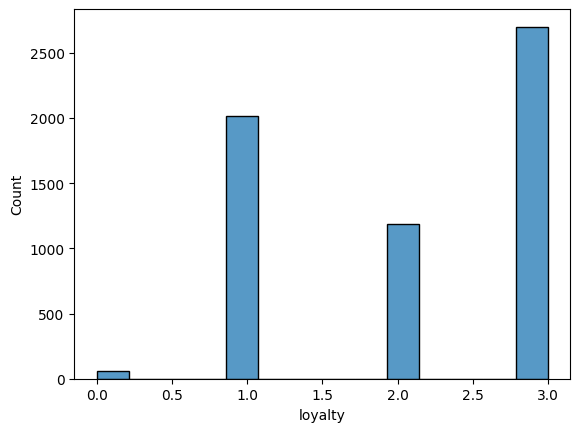

In [ ]:
# -Meher
sns.histplot(df.loyalty)

- The data suggests that the majority of the customers have either high or low loyalty (3.0 and 1.0 levels), with fewer customers in the middle range. This distribution could influence how the company targets its customer retention strategies, focusing on either maintaining high-loyalty customers or improving engagement with low-loyalty ones.








#### **Imputing null values of loyalty using decisionTreeClassifier** - Vedant

In [ ]:
# splitting the dataset on the missing value
df_missing = df[df.loyalty.isnull()]
df_not_missing = df[~df.loyalty.isnull()]

In [ ]:
x_train = df_not_missing.drop(columns=['loyalty'])
y_train = df_not_missing['loyalty']

In [ ]:
# assigning the missing to test data
x_test = df_missing.drop(columns=['loyalty'])

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# imputing the missing value with the Predicted value
df_missing['loyalty'] = clf.predict(x_test)

In [ ]:
df_missing.head()

,TARGET,loyalty,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
0,1,2.0,0,0,0,0,333.561114,264.721010,66,3
3,1,1.0,0,0,0,0,453.757916,242.341754,31,3
4,1,1.0,0,0,0,0,384.577469,287.008370,62,3
6,1,1.0,0,0,0,0,494.463651,215.976127,57,3
7,1,1.0,0,0,0,0,472.651570,246.208737,32,3


In [ ]:
df = pd.concat([df_not_missing, df_missing])

In [ ]:
df.loyalty.value_counts()

,count
loyalty,
3.0,4066
1.0,3651
2.0,3232
0.0,59


In [ ]:
df['loyalty'] = df['loyalty'].astype('int')

In [ ]:
df.shape

(11008, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11008 entries, 1 to 11006
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      11008 non-null  int64  
 1   loyalty     11008 non-null  int64  
 2   prod_A      11008 non-null  int64  
 3   type_A      11008 non-null  int64  
 4   type_B      11008 non-null  int64  
 5   prod_B      11008 non-null  int64  
 6   turnover_A  11008 non-null  float64
 7   turnover_B  11008 non-null  float64
 8   age_P       11008 non-null  int64  
 9   lor_M       11008 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 946.0 KB


# **EDA**

In [ ]:
# - Sainath
# List of numerical columns & categorical_columns
numerical_columns = ['turnover_A', 'turnover_B', 'age_P', 'lor_M']
categorical_columns = ['loyalty','prod_A', 'type_A', 'type_B', 'prod_B']


In [ ]:
# Using histplot definition which takes two prams columns and dataframe and plot the graph as output - Sainath
def histplot(col,df):
  plt.figure(figsize=(10,20))
  for i,j in itertools.zip_longest(col,range(len(col))):
    plt.subplot(2,2,j+1)
    sns.histplot(df[i],kde=True)
    plt.title(i)

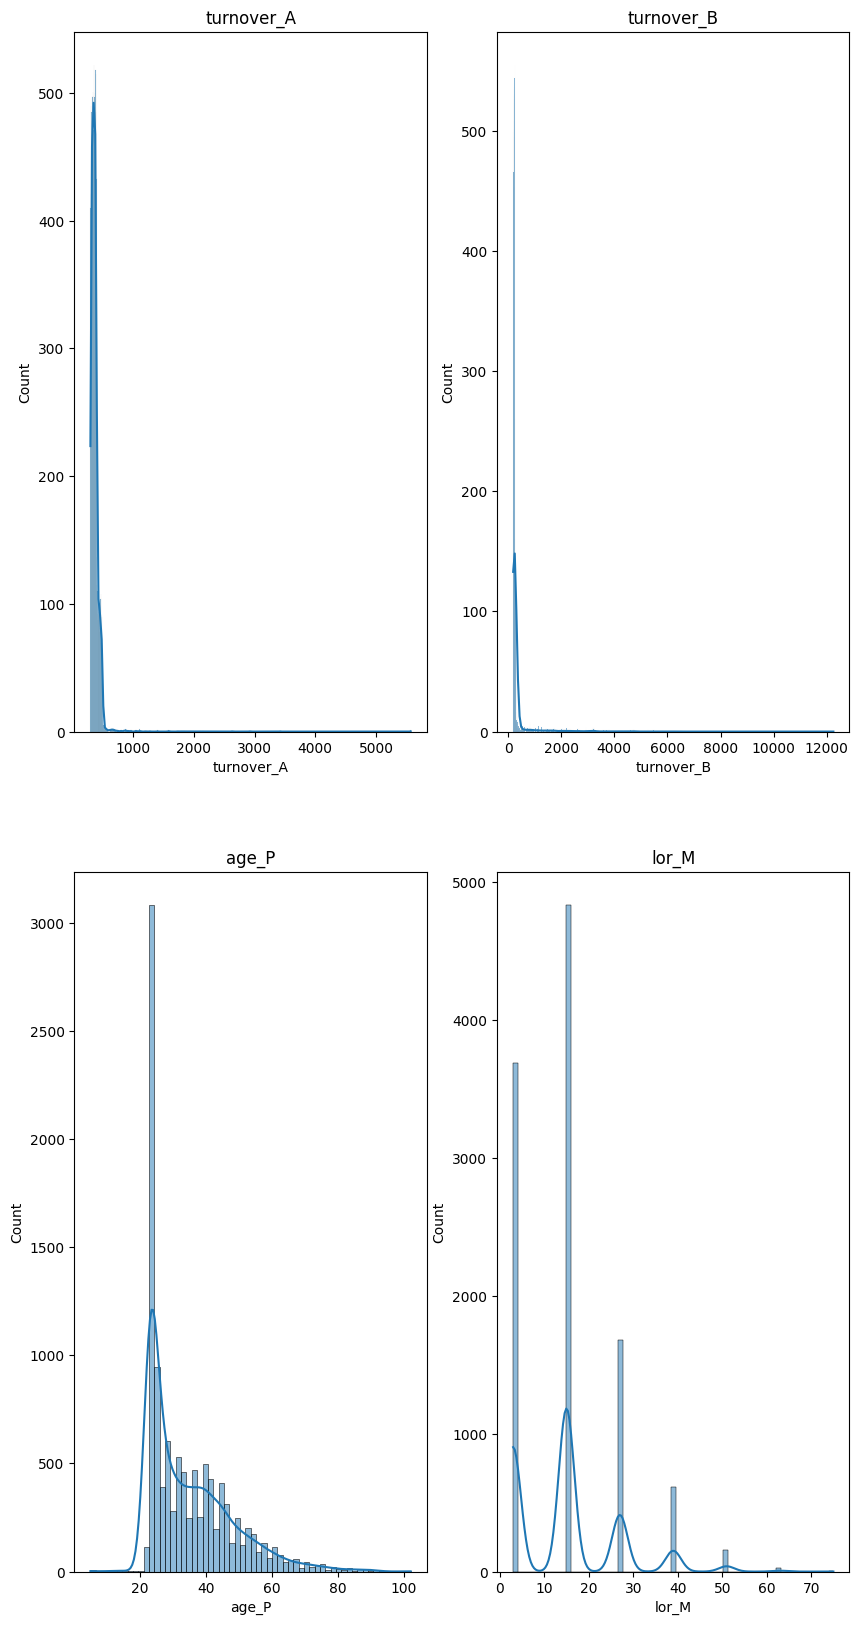

In [ ]:
# - Sainath
histplot(numerical_columns,df)

**Turnover (A & B):** Both turnover_A and turnover_B show a highly skewed distribution with most values concentrated near the lower range, indicating that most customers have low turnover amounts for both products.

**Age of Partner (age_P):** The distribution is right-skewed, with most partners being younger (in their 20s to 40s) and very few in older age brackets.

**Length of Relationship in Months (lor_M):** The lor_M variable has a multimodal distribution, with significant counts at key intervals (e.g., around 10, 20, 30, and 50 months), suggesting distinct groups based on relationship duration.







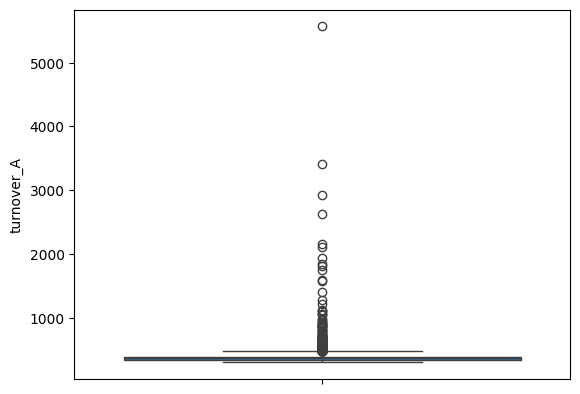

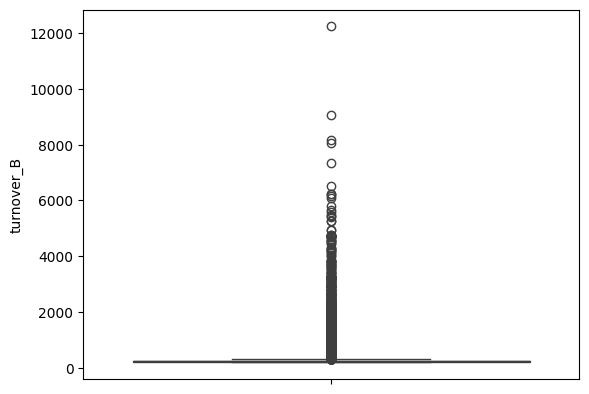

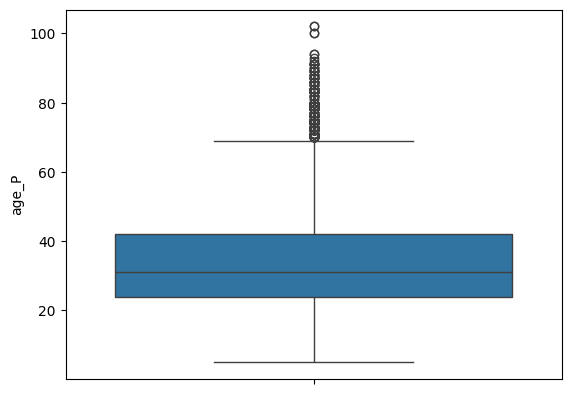

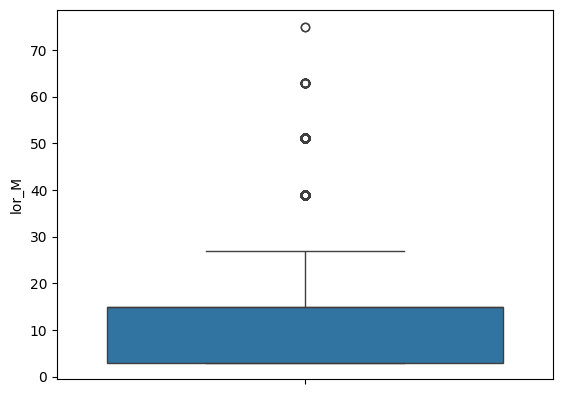

In [ ]:
# - Sainath
for i in numerical_columns:
  sns.boxplot(df[i])
  plt.show()

The boxplot for turnover_B shows a high concentration of data points near the lower end, with several significant outliers extending upwards, including values above 12,000. This indicates that while most customers have relatively low turnover for product B, a few customers have exceptionally high turnover, creating a long tail of outliers. These outliers might require further investigation to determine their impact on the model.

<Axes: xlabel='loyalty', ylabel='Density'>

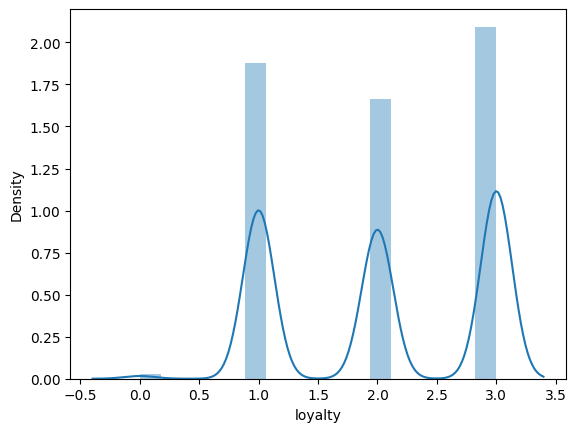

In [ ]:
# - Sainath
sns.distplot(df['loyalty'])

The density plot of loyalty shows three distinct peaks, corresponding to loyalty levels 1.0, 2.0, and 3.0, with the highest density at level 3.0, followed by level 1.0. This suggests that most customers fall into the highest and lowest loyalty categories. The near-zero density at loyalty 0.0 indicates that very few customers have minimal or no loyalty. This distribution highlights a polarized customer base in terms of loyalty.









Bivariate analysis

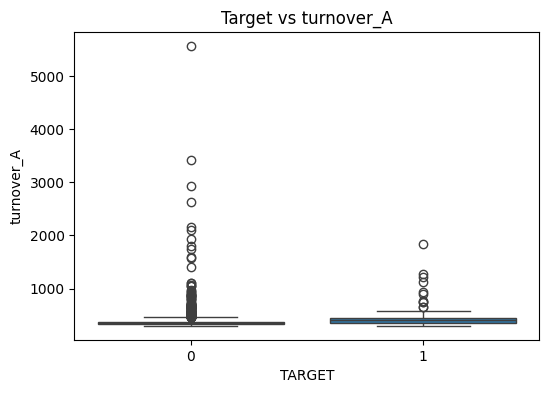

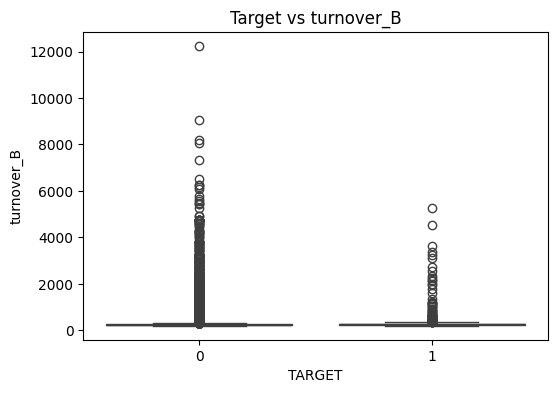

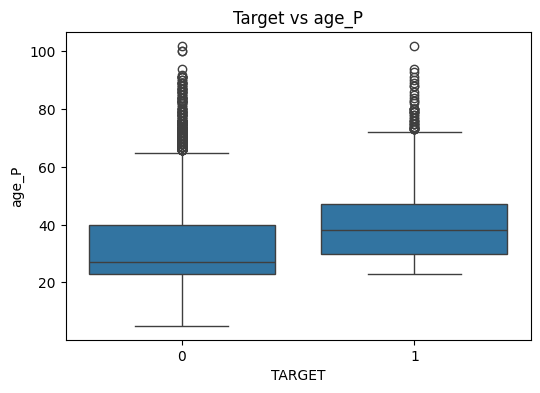

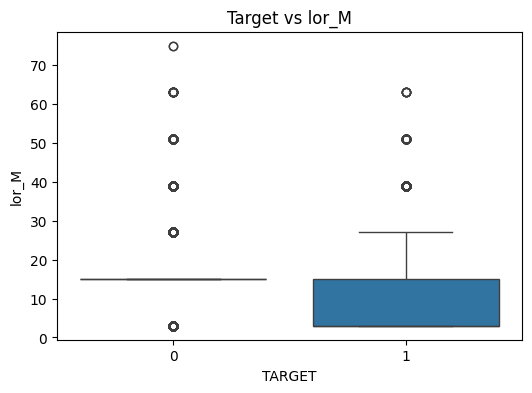

In [ ]:
# Plotting relationships with target for numerical variables - Sainath
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='TARGET', y=col, data=df)
    plt.title(f'Target vs {col}')
    plt.show()

The boxplot compares turnover_A for customers who did not purchase the new product (TARGET = 0) versus those who did (TARGET = 1). Both groups show similar turnover distributions, with several outliers in each group, especially for TARGET = 0, where one outlier exceeds 5000. Customers with higher turnover in Product A tend to be in the non-purchasing group, while the turnover for those who purchased the product is generally lower and more consistent, though still with some outliers.

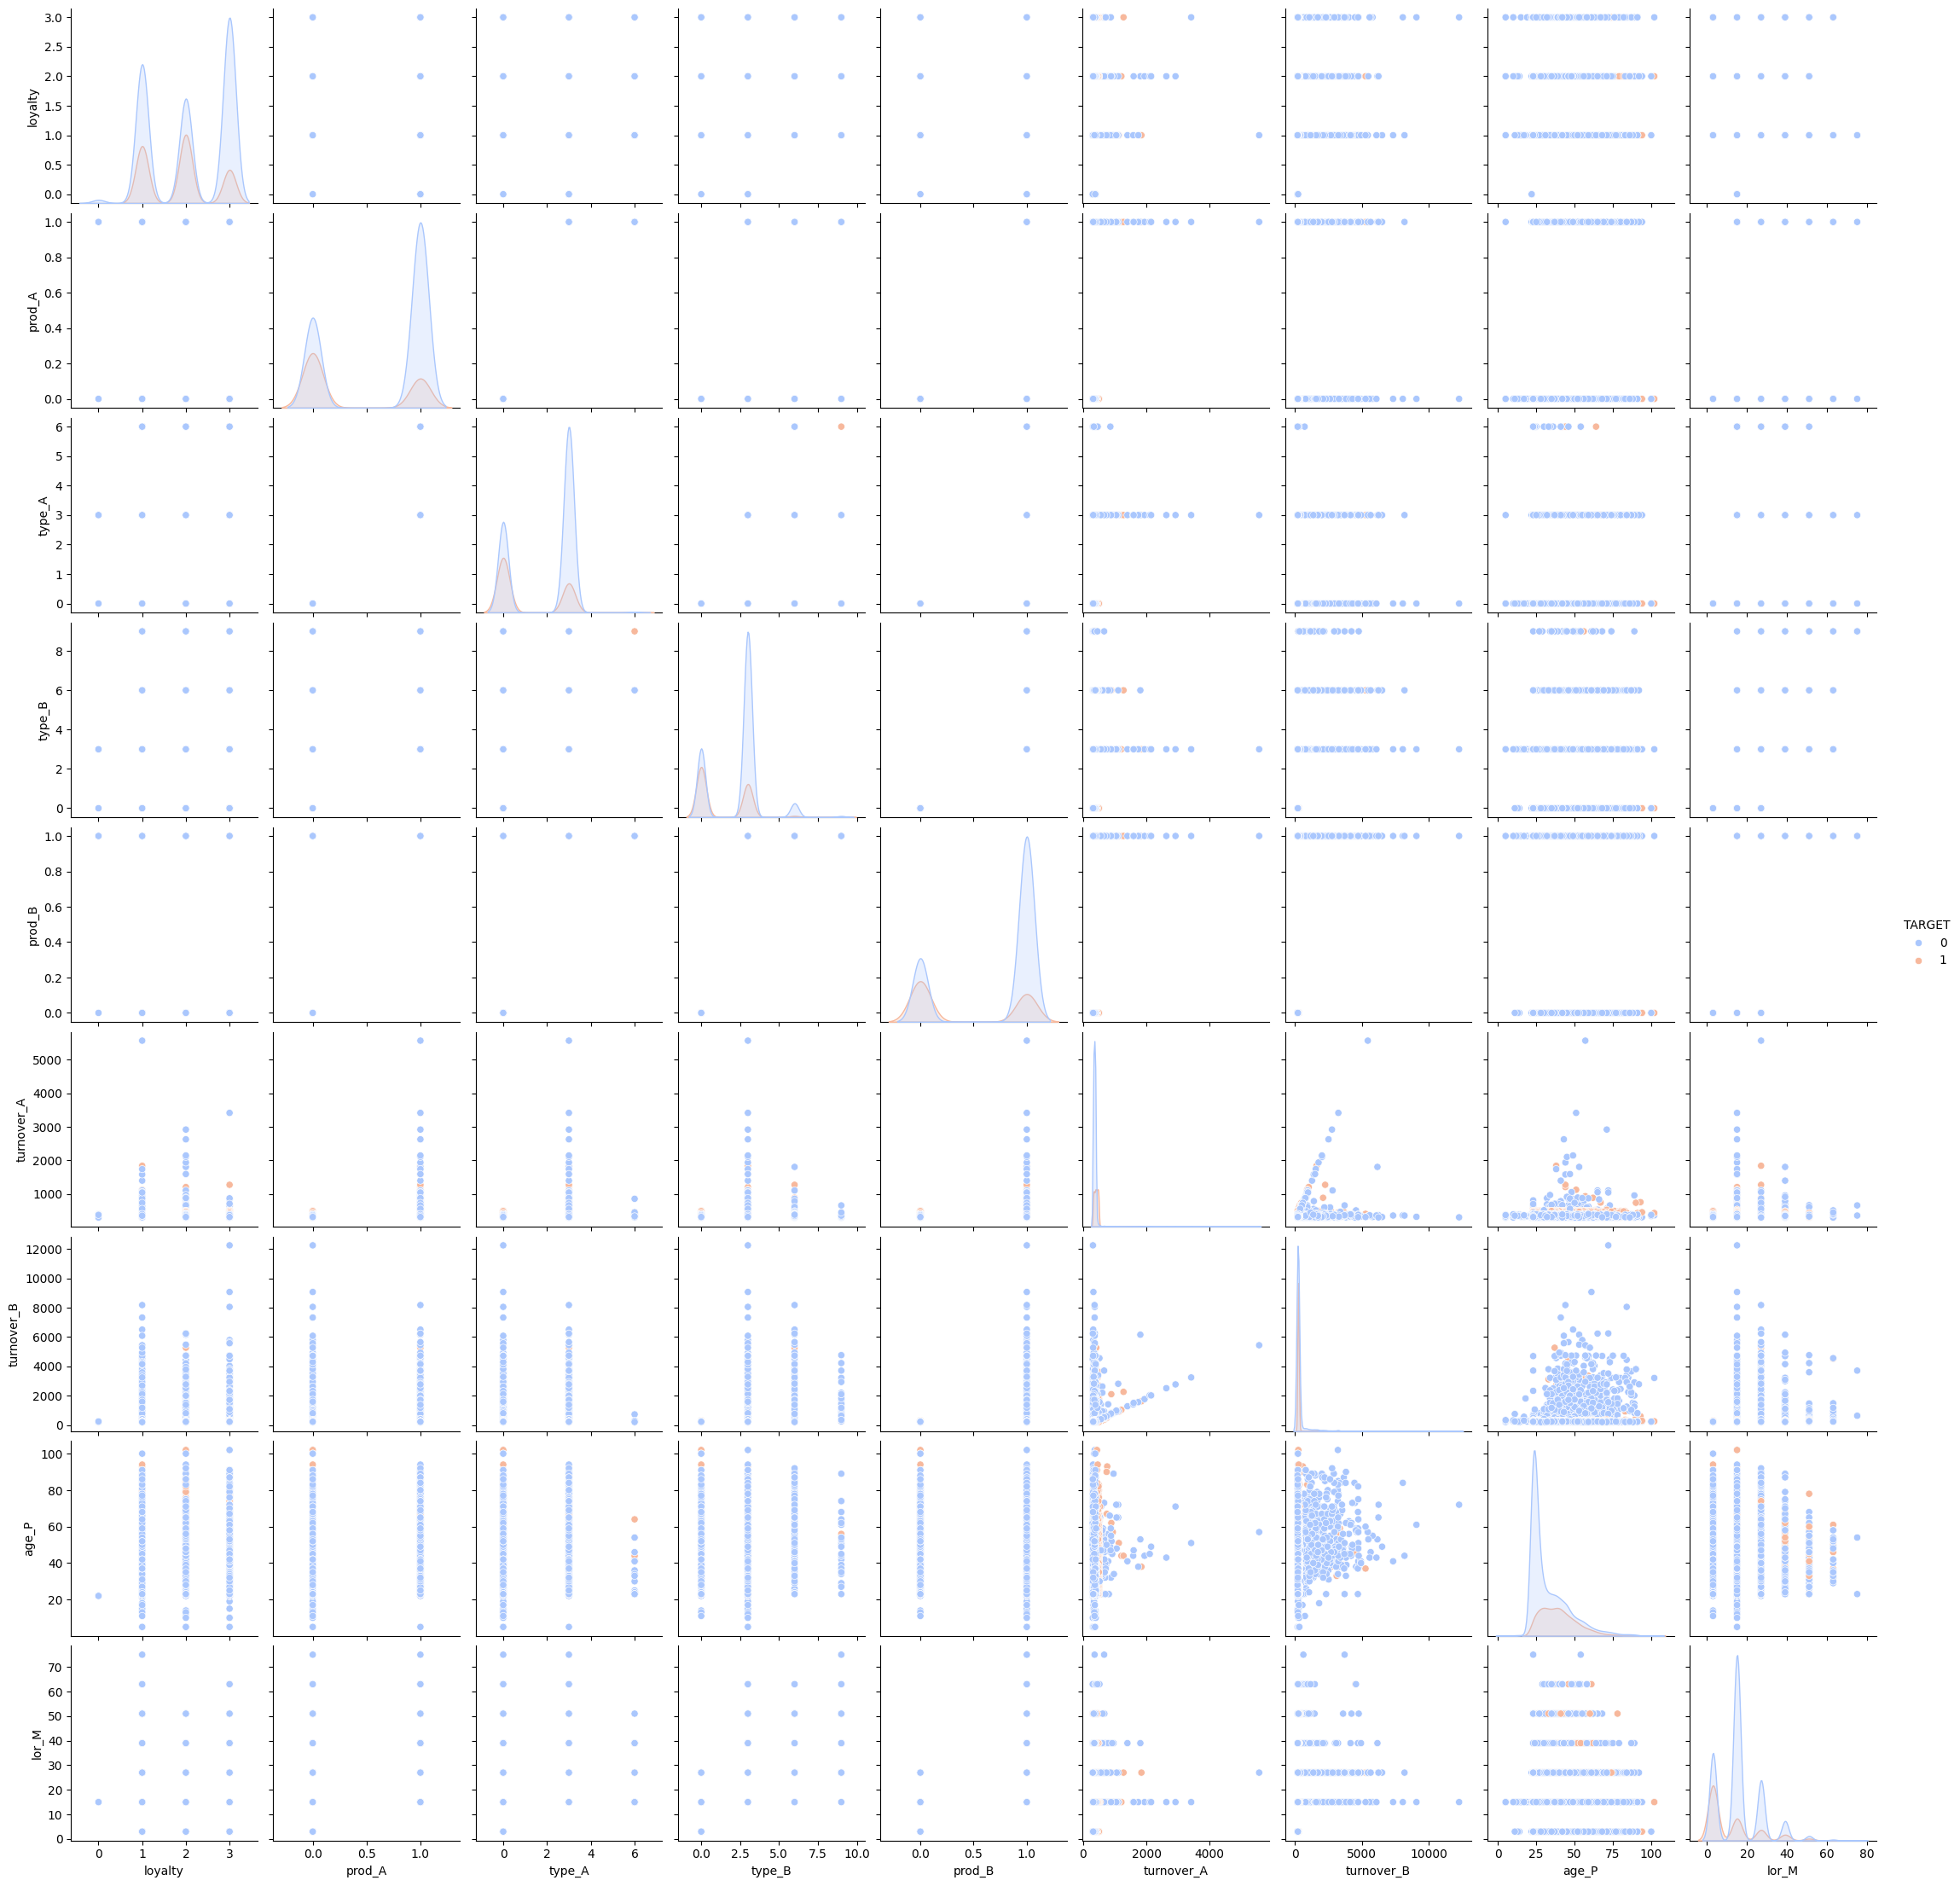

In [ ]:
# - Sainath
sns.pairplot(df, hue='TARGET', diag_kind='kde', palette='coolwarm')

- There is no strong linear correlation between most features, though turnover_A and turnover_B exhibit some noticeable clustering and outliers.

- The distributions of loyalty and age_P are distinctly separated into clusters, suggesting that these variables have distinct categories in the dataset.

- The scatter plots show that while some variables are scattered, there are a few patterns between turnover_A, turnover_B, and the target variable.

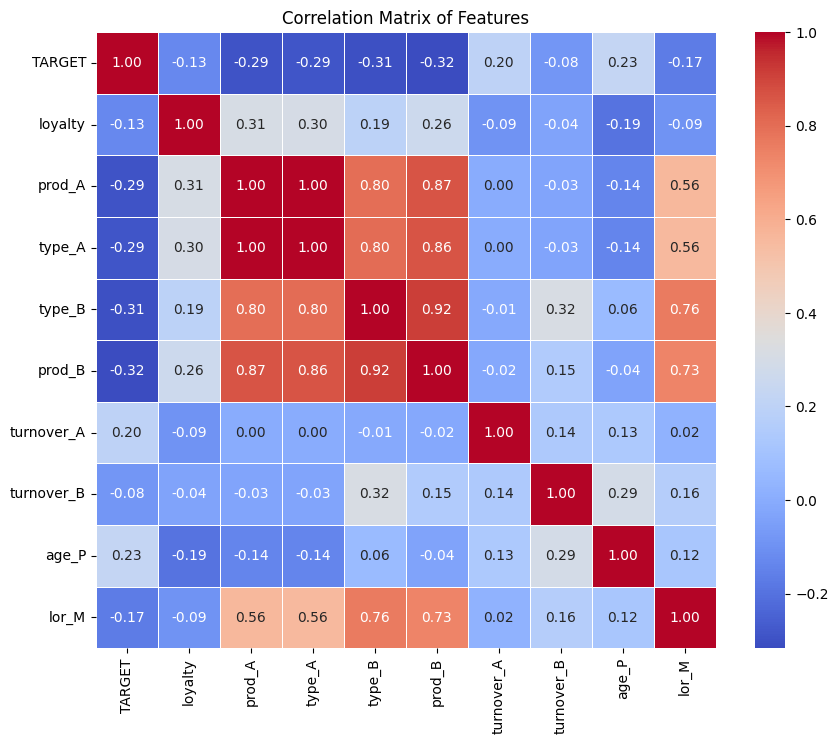

In [ ]:
# - Sainath
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

- TARGET shows negative correlations with product-related features such as prod_A, type_A, prod_B, and type_B, indicating that customers who purchased additional products tend to have lower values for these features.

- Strong positive correlations exist between prod_A, type_A, prod_B, and type_B, suggesting that customers who purchase one product are more likely to purchase other related products.

- Turnover-related features (turnover_A and turnover_B) have weak correlations with both the target and other features, indicating less influence on the purchase decision.

In [ ]:
# - Sainath
df.corr()['TARGET'].sort_values(ascending=False)

,TARGET
TARGET,1.000000
age_P,0.227510
turnover_A,0.201813
turnover_B,-0.084418
loyalty,-0.127212
lor_M,-0.171396
type_A,-0.290637
prod_A,-0.293210
type_B,-0.306086
prod_B,-0.316734


In [ ]:
# - Sainath
df.describe()

,TARGET,loyalty,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
count,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000
mean,0.273256,2.026980,0.584393,1.759448,2.097929,0.652253,372.332403,344.120565,34.845203,14.791788
std,0.445651,0.849595,0.492849,1.490133,1.671441,0.476277,96.685932,524.372413,13.032781,11.272981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,5.000000,3.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,332.229899,218.302029,24.000000,3.000000
50%,0.000000,2.000000,1.000000,3.000000,3.000000,1.000000,361.930298,235.025216,31.000000,15.000000
75%,1.000000,3.000000,1.000000,3.000000,3.000000,1.000000,391.567662,253.759401,42.000000,15.000000
max,1.000000,3.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,102.000000,75.000000


# **Data Prep**

In [ ]:
# - Sainath
df.type_A.value_counts()

,count
type_A,
3,6410
0,4575
6,23


In [ ]:
# - Sainath
df.type_B.value_counts()

,count
type_B,
3,6695
0,3828
6,452
9,33


In [ ]:
# Creating dummy variable for categorical cols  - Sainath
data = pd.get_dummies(df,columns=['loyalty','type_A','type_B'], drop_first=True)

In [ ]:
# - Sainath
data.head()

,TARGET,prod_A,prod_B,turnover_A,turnover_B,age_P,lor_M,loyalty_1,loyalty_2,loyalty_3,type_A_3,type_A_6,type_B_3,type_B_6,type_B_9
1,1,1,1,394.735699,284.904978,45,39,True,False,False,True,False,True,False,False
2,1,1,1,342.180990,1175.589721,42,27,True,False,False,True,False,False,True,False
5,1,1,1,460.442339,247.467516,24,15,False,False,True,True,False,True,False,False
10,1,1,1,466.834730,208.055524,44,15,False,False,True,True,False,True,False,False
11,1,1,1,373.652449,243.133339,36,27,True,False,False,True,False,True,False,False


In [ ]:
# - Sainath
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data.head()

,TARGET,prod_A,prod_B,turnover_A,turnover_B,age_P,lor_M,loyalty_1,loyalty_2,loyalty_3,type_A_3,type_A_6,type_B_3,type_B_6,type_B_9
0,1.0,1.0,1.0,0.017963,0.007708,0.412371,0.500000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,0.007988,0.081581,0.381443,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.030434,0.004603,0.195876,0.166667,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,0.031647,0.001335,0.402062,0.166667,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.013961,0.004244,0.319588,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# - Sainath
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11008 entries, 0 to 11007
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      11008 non-null  float64
 1   prod_A      11008 non-null  float64
 2   prod_B      11008 non-null  float64
 3   turnover_A  11008 non-null  float64
 4   turnover_B  11008 non-null  float64
 5   age_P       11008 non-null  float64
 6   lor_M       11008 non-null  float64
 7   loyalty_1   11008 non-null  float64
 8   loyalty_2   11008 non-null  float64
 9   loyalty_3   11008 non-null  float64
 10  type_A_3    11008 non-null  float64
 11  type_A_6    11008 non-null  float64
 12  type_B_3    11008 non-null  float64
 13  type_B_6    11008 non-null  float64
 14  type_B_9    11008 non-null  float64
dtypes: float64(15)
memory usage: 1.3 MB


In [ ]:
# - Sainath
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,11008.0,0.273256,0.445651,0.0,0.000000,0.000000,1.000000,1.0
prod_A,11008.0,0.584393,0.492849,0.0,0.000000,1.000000,1.000000,1.0
prod_B,11008.0,0.652253,0.476277,0.0,0.000000,1.000000,1.000000,1.0
turnover_A,11008.0,0.013711,0.018351,0.0,0.006099,0.011736,0.017361,1.0
turnover_B,11008.0,0.012620,0.043491,0.0,0.002185,0.003572,0.005125,1.0
age_P,11008.0,0.307683,0.134359,0.0,0.195876,0.268041,0.381443,1.0
lor_M,11008.0,0.163775,0.156569,0.0,0.000000,0.166667,0.166667,1.0
loyalty_1,11008.0,0.331668,0.470834,0.0,0.000000,0.000000,1.000000,1.0
loyalty_2,11008.0,0.293605,0.455434,0.0,0.000000,0.000000,1.000000,1.0
loyalty_3,11008.0,0.369368,0.482656,0.0,0.000000,0.000000,1.000000,1.0


In [ ]:
# - Sainath
data['TARGET'].values.sum()

3008.0

In [ ]:
# what percentage of people Purchased the insurance?- Sainath
data['TARGET'].values.sum()/data.shape[0]

0.27325581395348836

In [ ]:
# Cheacking the Null error rate- Sainath
1-data['TARGET'].values.sum()/data.shape[0]

0.7267441860465116

We could achieve a training model accuracy of = 72.6%

# Feature selection

In [ ]:
# -Sainath
X = data.drop(columns=['TARGET'])
y = data['TARGET']

In [ ]:
# -Sainath
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [ ]:
# selecting feature from DecisionTree  -Sainath
feature_importances = pd.Series(tree.feature_importances_, index=X.columns)
important_features = feature_importances.sort_values(ascending=False)
print("Feature Importances from Decision Tree:\n", important_features)

Feature Importances from Decision Tree:
 turnover_A    0.454794
turnover_B    0.273184
prod_B        0.093757
age_P         0.093486
prod_A        0.016897
lor_M         0.015659
loyalty_3     0.015135
loyalty_1     0.012738
type_A_3      0.012306
loyalty_2     0.005820
type_B_3      0.004703
type_B_6      0.001521
type_A_6      0.000000
type_B_9      0.000000
dtype: float64


In [ ]:
# -Sainath
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=4)  # Select top 4 features
rfe.fit(X, y)

# Print selected features
selected_features_rfe = X.columns[rfe.support_]
print("Selected Features via RFE:\n", selected_features_rfe)

Selected Features via RFE:
 Index(['prod_B', 'turnover_A', 'turnover_B', 'age_P'], dtype='object')


# Model building

In [ ]:
# - Vedant
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8806, 14), (2202, 14), (8806,), (2202,))

In [ ]:
# - Vedant
x_train_rfe = x_train[selected_features_rfe]
x_test_rfe = x_test[selected_features_rfe]

## Model KNN

### Knn1

In [ ]:
# Standardizing the data and apply KNN with k=5 - Vedant
pipeline_knn1 = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipeline_knn1.fit(x_train_rfe, y_train)

y_pred_knn1 = pipeline_knn1.predict(x_test_rfe)

In [ ]:
# - Vedant
print("KNN Model 1 (k=5) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn1))
print(confusion_matrix(y_test, y_pred_knn1))
print(classification_report(y_test, y_pred_knn1))

KNN Model 1 (k=5) Performance:
Accuracy: 0.8487738419618529
Precision: 0.788546255506608
Recall: 0.6016806722689075
F1 Score: 0.6825548141086749
[[1511   96]
 [ 237  358]]
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1607
         1.0       0.79      0.60      0.68       595

    accuracy                           0.85      2202
   macro avg       0.83      0.77      0.79      2202
weighted avg       0.84      0.85      0.84      2202



### knn2

In [ ]:
# Appling KNN with k=7 - Vedant
pipeline_knn2 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=7))
])

pipeline_knn2.fit(x_train_rfe, y_train)

y_pred_knn2 = pipeline_knn2.predict(x_test_rfe)

In [ ]:
# - Vedant
print("KNN Model 2 (k=7) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn2))
print(confusion_matrix(y_test, y_pred_knn2))
print(classification_report(y_test, y_pred_knn2))

KNN Model 2 (k=7) Performance:
Accuracy: 0.8551316984559492
Precision: 0.8209302325581396
Recall: 0.5932773109243697
F1 Score: 0.688780487804878
[[1530   77]
 [ 242  353]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91      1607
         1.0       0.82      0.59      0.69       595

    accuracy                           0.86      2202
   macro avg       0.84      0.77      0.80      2202
weighted avg       0.85      0.86      0.85      2202



## Model SVM

### SVM1

In [ ]:
# Standardize the data and apply SVM with a linear kernel  - Vedant
pipeline_svm1 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])
# Train the model
pipeline_svm1.fit(x_train_rfe, y_train)

# Predictions and evaluation on test set
y_pred_svm1 = pipeline_svm1.predict(x_test_rfe)

In [ ]:
print("SVM Model 1 (Linear Kernel) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm1))
print(confusion_matrix(y_test, y_pred_svm1))
print(classification_report(y_test, y_pred_svm1))

SVM Model 1 (Linear Kernel) Performance:
Accuracy: 0.8147138964577657
Precision: 0.7575757575757576
Recall: 0.46218487394957986
F1 Score: 0.5741127348643006
[[1519   88]
 [ 320  275]]
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88      1607
         1.0       0.76      0.46      0.57       595

    accuracy                           0.81      2202
   macro avg       0.79      0.70      0.73      2202
weighted avg       0.81      0.81      0.80      2202



### SVM 2

In [ ]:
# Standardize the data and apply SVM with an RBF kernel - Vedant
pipeline_svm2 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])

pipeline_svm2.fit(x_train_rfe, y_train)

y_pred_svm2 = pipeline_svm2.predict(x_test_rfe)

In [ ]:
print("SVM Model 2 (RBF Kernel) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm2))
print(confusion_matrix(y_test, y_pred_svm2))
print(classification_report(y_test, y_pred_svm2))

SVM Model 2 (RBF Kernel) Performance:
Accuracy: 0.8496821071752951
Precision: 0.8567567567567568
Recall: 0.5327731092436975
F1 Score: 0.6569948186528497
[[1554   53]
 [ 278  317]]
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90      1607
         1.0       0.86      0.53      0.66       595

    accuracy                           0.85      2202
   macro avg       0.85      0.75      0.78      2202
weighted avg       0.85      0.85      0.84      2202



## Evaluvating Model

In [ ]:
# Defining a dictionary to store model performances - Sainath
model_performance = {}

# Defining a function to compute all required metrics
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Cross-validation accuracy
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

    # Training the model
    model.fit(X_train, y_train)

    # Predicting on test set
    y_pred_test = model.predict(X_test)

    # Computing accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Confusion matrix, classification report, and ROC-AUC
    confusion = confusion_matrix(y_test, y_pred_test)
    report = classification_report(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, 'predict_proba') else None

    # Store the results in the dictionary
    model_performance[model_name] = {
        'CV Accuracy': cv_accuracy,
        'Test Accuracy': test_accuracy,
        'Confusion Matrix': confusion,
        'Classification Report': report,
        'ROC-AUC': roc_auc
    }

# Evaluate KNN Model 1 (k=5 with Standard Scaling)
evaluate_model(pipeline_knn1, x_train_rfe, y_train, x_test_rfe, y_test, "KNN Model 1 (k=5)")

# Evaluate KNN Model 2 (k=7 with Min-Max Scaling)
evaluate_model(pipeline_knn2, x_train_rfe, y_train, x_test_rfe, y_test, "KNN Model 2 (k=7)")

# Evaluate SVM Model 1 (Linear Kernel)
evaluate_model(pipeline_svm1, x_train_rfe, y_train, x_test_rfe, y_test, "SVM Model 1 (Linear Kernel)")

# Evaluate SVM Model 2 (RBF Kernel)
evaluate_model(pipeline_svm2, x_train_rfe, y_train, x_test_rfe, y_test, "SVM Model 2 (RBF Kernel)")

# Display the performance of all models
for model_name, metrics in model_performance.items():
    print(f"\nPerformance of {model_name}:")
    print(f"Cross-Validation Accuracy: {metrics['CV Accuracy']}")
    print(f"Test Accuracy: {metrics['Test Accuracy']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    if metrics['ROC-AUC']:
        print(f"ROC-AUC: {metrics['ROC-AUC']}")


Performance of KNN Model 1 (k=5):
Cross-Validation Accuracy: 0.8478305652615857
Test Accuracy: 0.8487738419618529
Confusion Matrix:
[[1511   96]
 [ 237  358]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1607
         1.0       0.79      0.60      0.68       595

    accuracy                           0.85      2202
   macro avg       0.83      0.77      0.79      2202
weighted avg       0.84      0.85      0.84      2202

ROC-AUC: 0.8494025612734204

Performance of KNN Model 2 (k=7):
Cross-Validation Accuracy: 0.8536222131553826
Test Accuracy: 0.8551316984559492
Confusion Matrix:
[[1530   77]
 [ 242  353]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91      1607
         1.0       0.82      0.59      0.69       595

    accuracy                           0.86      2202
   macro avg       0.84      0.77      0.80      2202
weighte

# **Conclusion**

Among the models tested, KNN Model 2 (k=7) and SVM Model 2 (RBF kernel) showed competitive performance, achieving test accuracies of 85.5% and 84.9%, respectively. KNN Model 2 exhibited a slightly higher precision for both classes and an ROC-AUC of 0.875, suggesting its strong discriminatory capability. SVM Model 2 also performed well, particularly in capturing a high recall for the majority class, with an ROC-AUC of 0.849.

Ultimately, KNN Model 2 (k=7) is selected as the preferred model due to its superior ROC-AUC score, balanced accuracy, and straightforward interpretability relative to the SVM models. These characteristics make KNN Model 2 an effective choice for predicting potential additional purchases, providing a reliable tool for improving targeted marketing and customer retention strategies. Future improvements might include testing additional algorithms or incorporating ensemble methods to further enhance predictive power.